In [ ]:
# 🇵🇰 Pakistan E-Commerce Data Analysis
This notebook performs **data cleaning**, **visualization**, **regression**, and **clustering** on a real-world dataset.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv("dataset.csv")
df.head()


,Invoice ID,Product Name,Category,Quantity,Price,Payment Method,Order Date,Customer City,Refunded
0,INV0000,Shirt,Home,3,48105,COD,1/1/2023,Islamabad,0
1,INV0001,Book,Beauty,4,40580,Card,1/2/2023,Karachi,0
2,INV0002,Book,Electronics,1,38588,JazzCash,1/3/2023,Lahore,0
3,INV0003,Phone,Clothing,3,13716,Easypaisa,1/4/2023,Karachi,0
4,INV0004,Sofa,Home,3,36047,Easypaisa,1/5/2023,Rawalpindi,0


In [2]:

print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Shape: (1000, 9)

Missing values per column:
 Invoice ID        0
Product Name      0
Category          0
Quantity          0
Price             0
Payment Method    0
Order Date        0
Customer City     0
Refunded          0
dtype: int64

Duplicate rows: 0


##  Visualization 1: Product Category Distribution

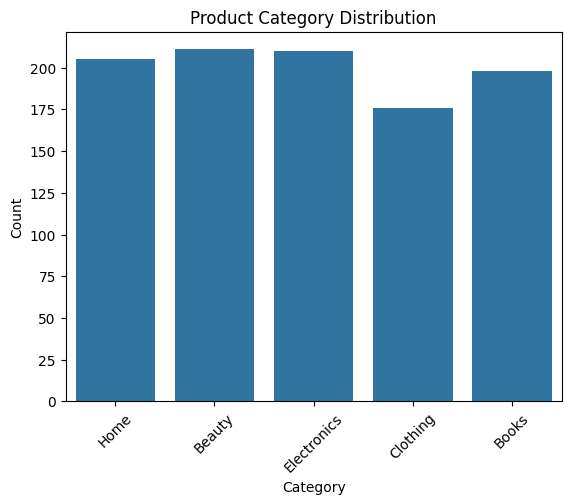

In [3]:

sns.countplot(data=df, x='Category')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##  Visualization 2: Payment Methods

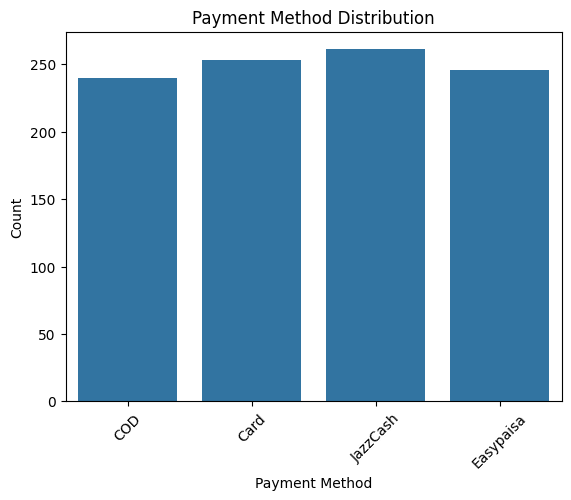

In [4]:

sns.countplot(data=df, x='Payment Method')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##  Visualization 3: Customer City

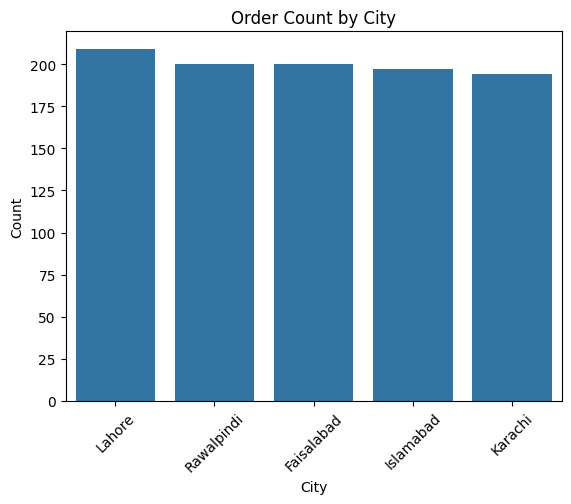

In [5]:

sns.countplot(data=df, x='Customer City', order=df['Customer City'].value_counts().index)
plt.title('Order Count by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
##  Visualization 4: Price Distribution

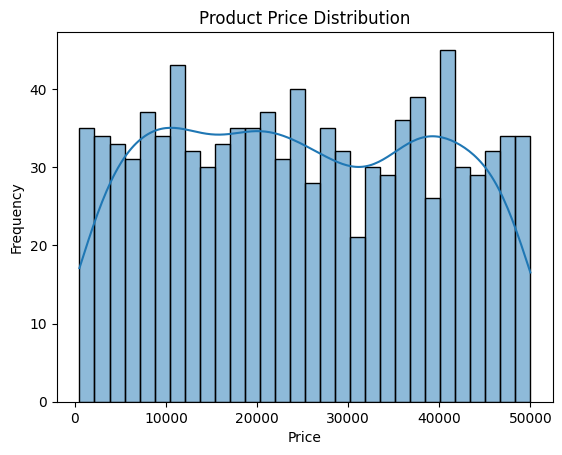

In [6]:

sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


##  Visualization 5: Quantity Ordered by Category

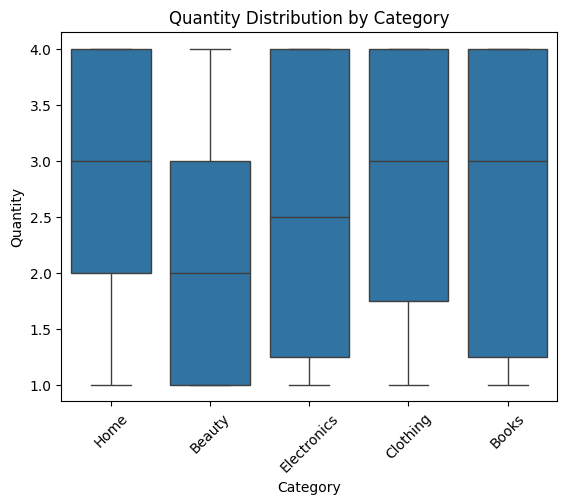

In [7]:

sns.boxplot(data=df, x='Category', y='Quantity')
plt.title('Quantity Distribution by Category')
plt.xticks(rotation=45)
plt.show()


##  Encode Categorical Variables

In [8]:

le = LabelEncoder()
for col in ['Category', 'Payment Method', 'Customer City', 'Product Name']:
    df[col] = le.fit_transform(df[col])


##  Regression: Predicting Price from Quantity & Category

In [9]:

X = df[['Quantity', 'Category']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("Intercept (b0):", reg.intercept_)
print("Coefficients (b1, b2):", reg.coef_)


MSE: 217730566.81730843
Intercept (b0): 25920.36738002284
Coefficients (b1, b2): [-567.77754643  155.95009472]


##  Clustering: KMeans on Quantity and Price

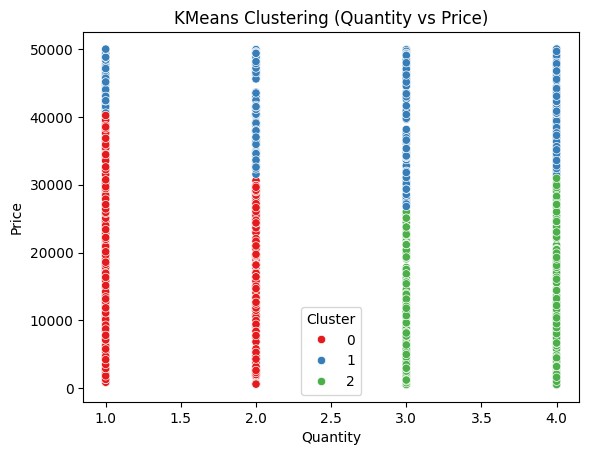

In [10]:

scaler = StandardScaler()
kdata = scaler.fit_transform(df[['Quantity', 'Price']])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(kdata)

sns.scatterplot(x=df['Quantity'], y=df['Price'], hue=df['Cluster'], palette='Set1')
plt.title("KMeans Clustering (Quantity vs Price)")
plt.show()
